# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
# Spiral numbers

In [2]:
def is_prime(n):
    if n == 1:
        return False
    for i in range(2,int(n**0.5)+1):
        if n % i == 0:
            return False
    return True

In [3]:
def a_coor(n,x,y):
    return [x+n-1,y+n-1]

In [4]:
def create_spiral_numbers(n):
    spiral_numbers = np.zeros((2*n-1,2*n-1))
    x,y = a_coor(n,0,0)
    spiral_numbers[x][y] = 1
    for i in range(2,n+1):
        
        for j in range(2-i,i):
            x,y = a_coor(n,i-1,j)
            spiral_numbers[x][y] = (2*i-3)**2 + 6*i - 6 + np.abs(j - (1-i))
        
        for k in range(i-2,-i,-1):
            x,y = a_coor(n,k,i-1)
            spiral_numbers[x][y] = (2*i-3)**2 + np.abs(k - (i-1))

        for l in range(i-2,-i,-1):
            x,y = a_coor(n,1-i,l)
            spiral_numbers[x][y] = (2*i-3)**2 + 2*i - 2 + np.abs(l - (i-1))
            
        for m in range(2-i,i):
            x,y = a_coor(n,m,1-i)
            spiral_numbers[x][y] = (2*i-3)**2 + 4*i - 4 + np.abs(m - (1-i))
    return spiral_numbers

---
# Plots

In [5]:
def plot_spiral(spiral_numbers):
    n = len(spiral_numbers)
    plt.figure(figsize=(n/2,n/2))
    plt.imshow(spiral_numbers, cmap='viridis')

    for i in range(n):
        for j in range(n):
            if is_prime(int(spiral_numbers[i][j])):
                plt.text(j, i, str(int(spiral_numbers[i][j])), ha='center', va='center', color='red')
            else:
                plt.text(j, i, str(int(spiral_numbers[i][j])), ha='center', va='center', color='white')

    plt.axis('off')
    plt.show()

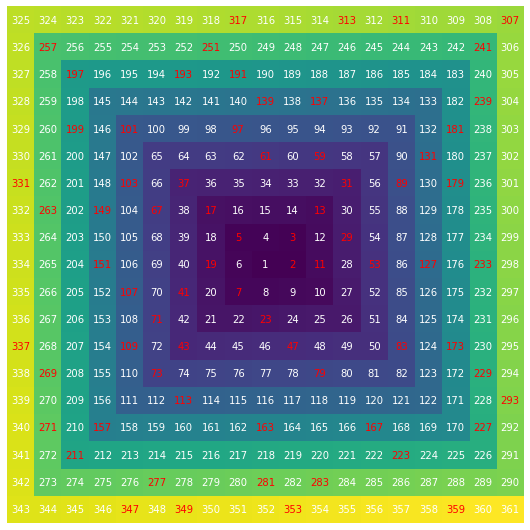

In [6]:
spiral_numbers = create_spiral_numbers(10)
plot_spiral(spiral_numbers)

In [7]:
def plot_bar(n):

    freq = np.zeros(n)
    freq[0] = 0
    for i in range(2,n+1):
        for j in range((2*i-3)**2+1, (2*i-1)**2 + 1):
            if is_prime(j):
                freq[i-1] += 1
        freq[i-1] = freq[i-1]/(8*i-8)
        
    plt.figure(figsize=(12,6))
    plt.bar(range(1, n + 1), freq, align='center')
    plt.xlabel('Value of n')
    plt.ylabel('Proportion')
    plt.title('Prime proportion in Given Range')
    plt.show()

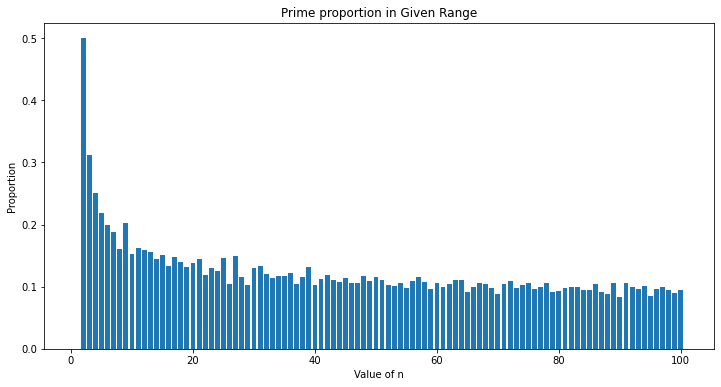

In [8]:
plot_bar(100)